In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns




/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [2]:
def wrangle(filename1, filename2):
    df_train = pd.read_csv(filename1)
    df_test = pd.read_csv(filename2)

    # Remove columns with lots of missing values
    df_train.drop(columns=["Cabin","Name","Ticket","SibSp","Parch"], inplace=True)
    df_test.drop(columns=["Cabin","Name","Ticket","SibSp","Parch"], inplace=True)

    # Drop rows with any NaN values
    # df_train.dropna(inplace=True)
    # df_test.dropna(inplace=True)

    # Set PassengerId as index
    df_train.set_index('PassengerId', inplace=True)
    df_test.set_index('PassengerId', inplace=True)


    return df_train, df_test


In [3]:
X_train,X_test = wrangle("/kaggle/input/titanic-machine-learning-from-disaster/train.csv","/kaggle/input/titanic-machine-learning-from-disaster/test.csv")

In [4]:
X_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
PassengerId,,,,,,
1,0,3,male,22.0,7.2500,S
2,1,1,female,38.0,71.2833,C
3,1,3,female,26.0,7.9250,S
4,1,1,female,35.0,53.1000,S
5,0,3,male,35.0,8.0500,S


In [5]:
X_train["Survived"].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 48.7+ KB


<Axes: >

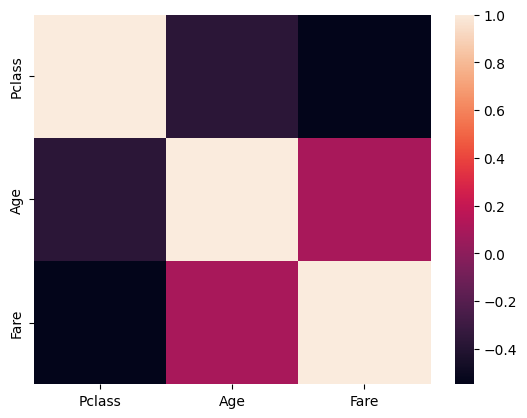

In [7]:
correlation = X_train.select_dtypes("number").drop(columns="Survived").corr()
sns.heatmap(correlation)

<Axes: >

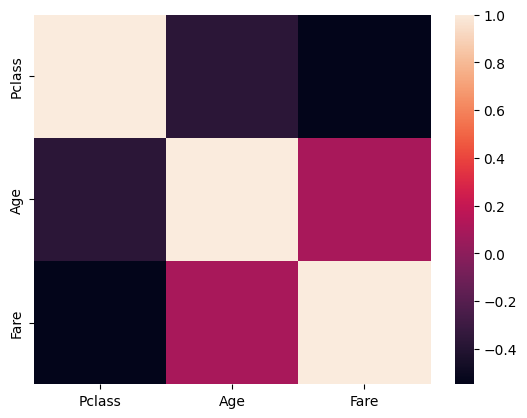

In [8]:
correlation = X_train.select_dtypes("number").drop(columns="Survived").corr()
sns.heatmap(correlation)

In [9]:
X_train["Survived"].corr(X_train["Fare"])

0.25730652238496227

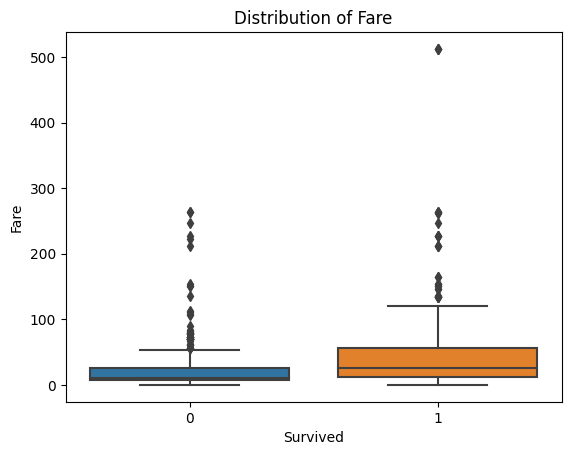

In [10]:
# Create boxplot
sns.boxplot(x= "Survived", y="Fare", data=X_train)

# Label axes
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.title("Distribution of Fare");

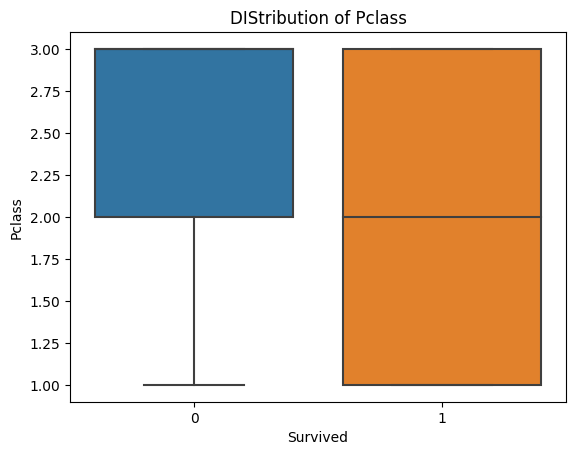

In [11]:
sns.boxplot(x= "Survived", y="Pclass", data=X_train)

# Label axes
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.title("DIStribution of Pclass");

<Axes: title={'center': 'Class balance'}, xlabel='Class', ylabel='Relative Frequency'>

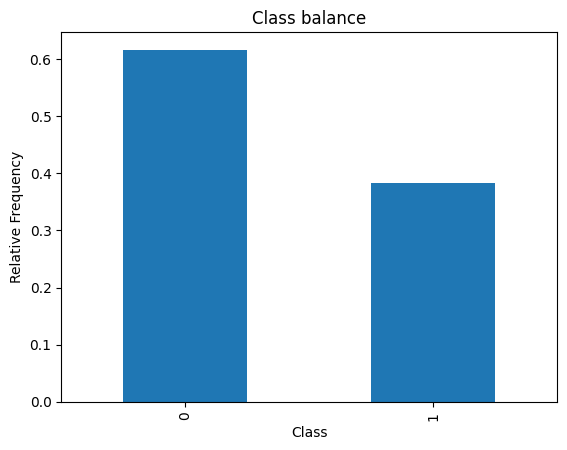

In [12]:
(X_train["Survived"].value_counts(normalize=True)).plot(
    kind="bar", xlabel= "Class", ylabel="Relative Frequency", title="Class balance"
)

In [13]:
majority_class_prop, minority_class_prop = (X_train["Survived"].value_counts(normalize=True))
print(majority_class_prop, minority_class_prop)

0.6161616161616161 0.3838383838383838


In [14]:
X_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
PassengerId,,,,,,
1,0,3,male,22.0,7.2500,S
2,1,1,female,38.0,71.2833,C
3,1,3,female,26.0,7.9250,S
4,1,1,female,35.0,53.1000,S
5,0,3,male,35.0,8.0500,S


In [15]:
pivot = pd.pivot_table(
    X_train, index="Pclass",values="Survived",aggfunc="mean"
).sort_values(by="Survived")
pivot

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


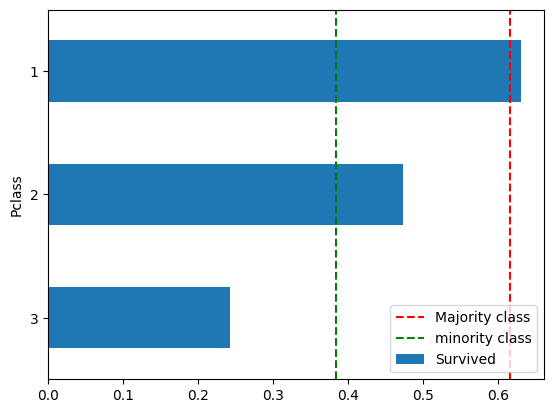

In [16]:
pivot.plot(kind="barh",legend=None)
plt.axvline(
        majority_class_prop, linestyle="--",color="red",label="Majority class"
)

plt.axvline(
        minority_class_prop, linestyle="--",color="green",label="minority class"
)
plt.legend(loc="lower right");

In [17]:
(X_train['Embarked'].unique())

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
X_train['Embarked'].value_counts()


Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [19]:
target = "Survived"
X = X_train.drop(columns="Survived")
y = X_train[target]

In [20]:
acc_baseline =y.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 2))

Baseline Accuracy: 0.62
